# Weekly project part 1
Using the image "appletree.jpg"
1) Can you segment the apples from the tree?
2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)
3) Can you change the color of one of them?
4) Can you segment the leaves?
    
    
# Weekly project part 2
1) Remove the greenscreen and replace the background in "itssp.png".
2) Can you improve the edge with eroding/dilating?


In [1]:
# PART 1
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

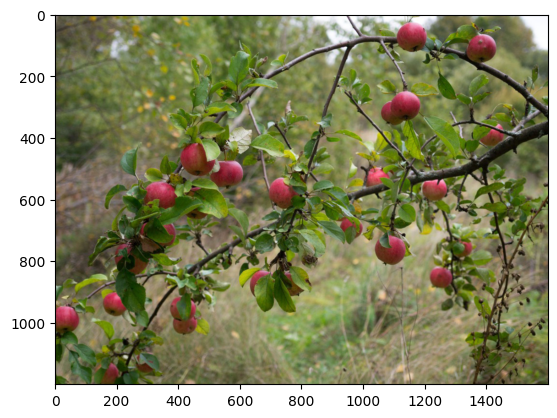

In [54]:
path = "appletree.jpg"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

In [85]:
# sharpen image
kernel = np.array([[-1,-1,-1], 
                    [-1, 9,-1],
                    [-1,-1,-1]])
image_sharp = cv2.filter2D(src=bgr_img, ddepth=-1, kernel=kernel)
cv2.imshow("Sharpend Image", image_sharp)
cv2.waitKey(0)
cv2.destroyAllWindows()


img_hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


# find thresholds in HSV space
lower_red1 = np.array([0, 110, 25])
upper_red1 = np.array([20, 255, 170])
mask0 = cv2.inRange(img_hsv, lower_red1, upper_red1)

lower_red2 = np.array([160, 40, 25])
upper_red2 = np.array([180, 255, 170])
mask1 = cv2.inRange(img_hsv, lower_red2, upper_red2)
# join masks
mask = mask0 + mask1

cv2.imshow("Mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# perform morphological operations
kernel = np.ones((8,8),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

cv2.imshow("Mask", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

# count number of apples
(cnt, hierarchy) = cv2.findContours(
    closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  
cv2.imshow("Detected Apples", rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Number of Apples in the image : ", len(cnt))

# output = cv2.bitwise_and(image, image, mask=mask)
# plt.imshow(mask)

mask = closing.copy()



Number of Apples in the image :  30


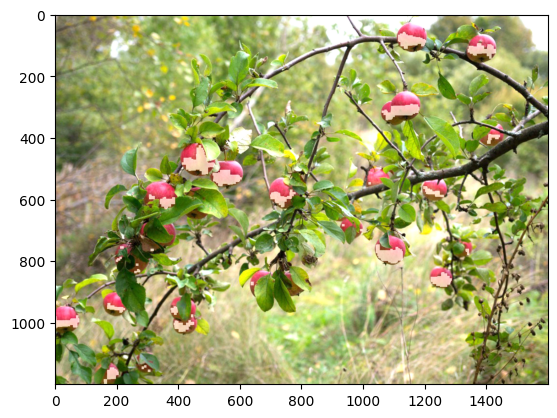

In [105]:
# change color
color_apple = np.copy(image)

color_apple[(mask!=0)] = [255,255,240]

# cv2.imshow("Colored Apple", mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imshow("Colored Apple", color_apple)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
new_apple = cv2.addWeighted(color_apple, 0.7, image, 0.7, 0, color_apple)

plt.imshow(color_apple)




error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/drawing.cpp:2508: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


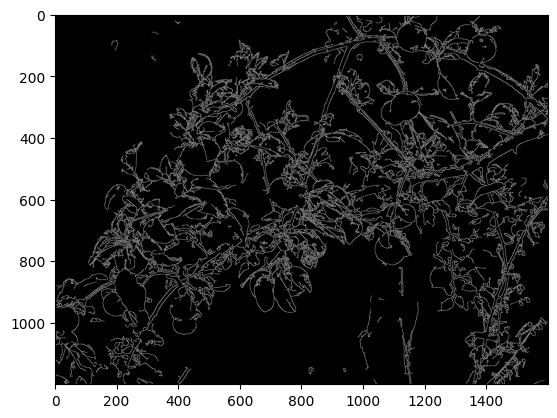

In [115]:
# segment leaves

# idea: use edge detection and use it as mask, then remove apples and tree branches 
# buuuuuuuut: too much effort and the TA said that color thresholding is good enough

# gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# plt.imshow(gray, cmap = 'gray')
# edged = cv2.Canny(gray, 30, 150)
# edged = np.array(edged)
# plt.imshow(edged, cmap='gray')

# mask_edge = np.zeros(gray.shape, np.uint8)
# cv2.drawContours(mask_edge, [edged.astype(int)], 0, (0, 255, 0), -1)

# ctr = np.array(edged).reshape((-1,1,2)).astype(np.int32)
# mask_edge = np.zeros(gray.shape, np.uint8)
# cv2.drawContours(mask_edge, [ctr], -1, (0, 255, 0), 0)

# mask_edge = np.zeros(gray.shape, np.uint8)
# cv2.drawContours(mask_edge, edged, -1, (255,255,255),1)
# plt.imshow(mask_edge)
# fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
# fgmask = fgbg.apply(image)
# plt.imshow(fgmask)



In [123]:
# segment leaves with color 
img_hsv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)


# find thresholds in HSV space
lower = np.array([35, 50, 20])
upper = np.array([65, 250, 120])
mask = cv2.inRange(img_hsv, lower, upper)


cv2.imshow("Mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# perform morphological operations
kernel = np.ones((4,4),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
kernel = np.ones((4,4),np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

cv2.imshow("Mask", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

# count number of apples
(cnt, hierarchy) = cv2.findContours(
    closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  
cv2.imshow("Leaves", rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


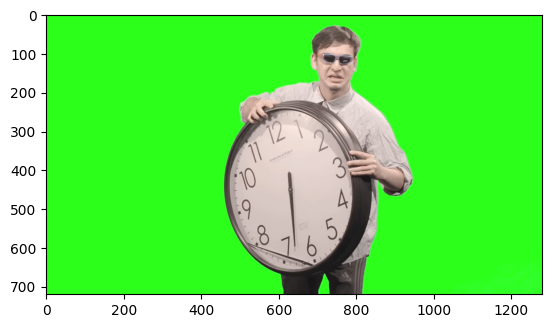

In [124]:
# PROJECT 2
path = "ittsp.png"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)


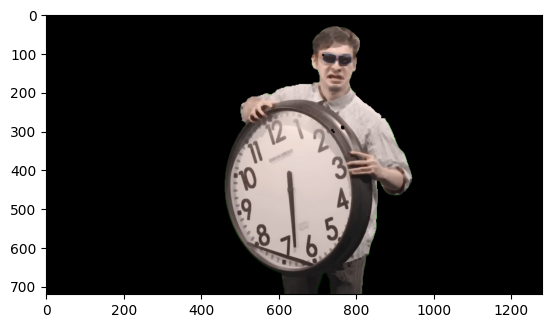

In [137]:
# just use RGB values for mask 
mask = ~(g >= 240)
mask = np.array(mask, np.int8)


output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# erosion to improve edges
mask = output.copy()
mask = cv2.erode(mask, None, iterations = 2)
plt.imshow(mask)
